# How to design more informative visualizations
## 5 Tips to spread your message more effectively across the audience with static visualizations

**Data Visualization** is a must-have skill you need to become a **data scientist**. Most of the time, we fully focus on learning how to use visualizations tools and we do not stop to think about the **designing principles** and **good practices** we should follow when it comes to making visualizations. Visualizations provide key insights at a glance and they communicate an idea much more effectively than raw data. That is mainly because human brains are unable to process large amounts of data at once. However, it is not enough to provide a visualization to the audience, it has to be properly designed. The **visualization design** highly affects how fast the information is conveyed to the viewers. For this reason, every element, from the layout to the color, labels, and background, has to be picked to **facilitate the transmission** of that information.

This article briefly explains the most important **designing principles** and how you can apply them to make a visualization **more informative** and **easy to process**. We will **redesign a visualization** step by step so you can perceive how each of those principles contributes to understanding the message more effectively. Additionally, we provided access to a **Github repository** where you can find the code used in this post. 

As a side note, I would like to mention that all the techniques explained in this article are intended for **static visualizations**. These visualizations can be found in printed newspapers, static reports, or corporate presentations. They focus exclusively on a **specific data story** and cannot be modified in real-time by the audience. On the contrary, **interactive visualizations** allow the user to answer questions by interacting with the data. For this reason, they should be designed using other principles and tools.

Let's say you are a **data journalist**, and you are writing an article about the performance of Atletico de Madrid since Diego Simeone joined the team in December 2011. The key message you want to convey to the audience is that **Atletico de Madrid is defensively much stronger than its direct rivals**. To do so, you perform the following visualization which depicts the goals against Spain's top teams in the last 10 seasons.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-deep')

df_scores = pd.read_csv('spanish_league.csv')

df_scores.head(2)

In [2]:
# data frame containing the goals against 
goals_against = df_scores.pivot(index='season', columns='club', values='goals_against')

goals_against.head(2)

# select the data from season 2010
seasons = ['2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16', '2016-17', '2017-18', '2018-19', '2019-20']
teams = ['Valencia', 'Real Madrid', 'Barcelona', 'Atlético de Madrid']

selected_teams = goals_against.loc[seasons, teams]

selected_teams

club,Valencia,Real Madrid,Barcelona,Atlético de Madrid
season,,,,
2010-11,44.0,33.0,21.0,53.0
2011-12,44.0,32.0,29.0,46.0
2012-13,54.0,42.0,40.0,31.0
2013-14,53.0,38.0,33.0,26.0
2014-15,32.0,38.0,21.0,29.0
2015-16,48.0,34.0,29.0,18.0
2016-17,65.0,41.0,37.0,27.0
2017-18,38.0,44.0,29.0,22.0
2018-19,35.0,46.0,36.0,29.0


Text(0, 0.5, 'Goals')

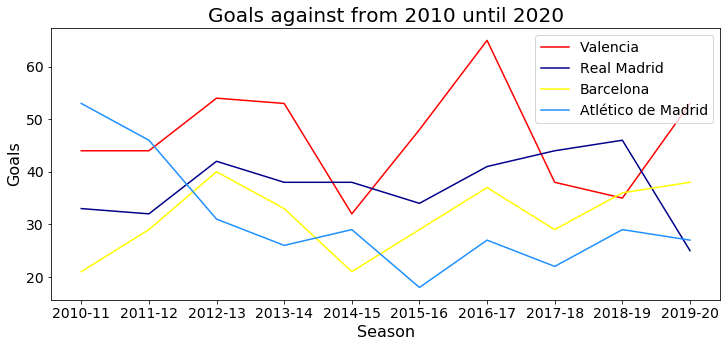

In [3]:
fig1 = plt.figure(figsize=(12,5))

ax = plt.gca()

# plot the results using a line plot
colors = ['red', 'darkblue', 'yellow',  'dodgerblue', 'darkviolet']

for index, column in enumerate(selected_teams.columns):
    ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])
    
# xticks size
ax.tick_params(axis='both', labelsize = 14)

# legend legend
ax.legend(fontsize=14, loc='upper right')

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Goals', fontsize=16)

Here, you have a specific message you want to communicate to your readers. However, the visualization does not convey that message at a glance. But how can you improve this visualization to communicate the message not only faster but also more effectively across the audience? Next, I will show you 5 techniques you can apply to your visualizations to make them more informative. Let's get started! 💜

# 1. Data-ink ratio
The **data-ink ratio** is a concept introduced by **Edward Tufte** in the early eighties and refers to the proportion of the plot´s ink that displays the actual data compared to the total ink (data-ink + non-data ink) used in the visualization.

### Data-ink Ratio = Data-ink / Total-ink

According to Tufte, a **key aspect** when designing a visualization is to obtain a **high data-ink ratio**. To achieve this goal, we have to **emphasize the elements that contain information** (in this case the lines of the plot) and try to reduce those that do not bring any information to the audience and are used exclusively for decoration purposes. **Non-data-ink** includes among other elements (1) 3D and shadow effects, (2) frames, (3) grid lines, (4) borders, and (5) backgrounds. These elements should be removed when they add no value to the visualization, so the most important information stands out. 

Now, it's time to apply **Tufte's design principles** and reduce the amount of **non-data-ink** present in our visualization. In this particular case, we only have to remove the top and right borders. However, if your visualization contains another of the aforementioned elements, you should seriously consider eliminating it.

Text(0, 0.5, 'Goals')

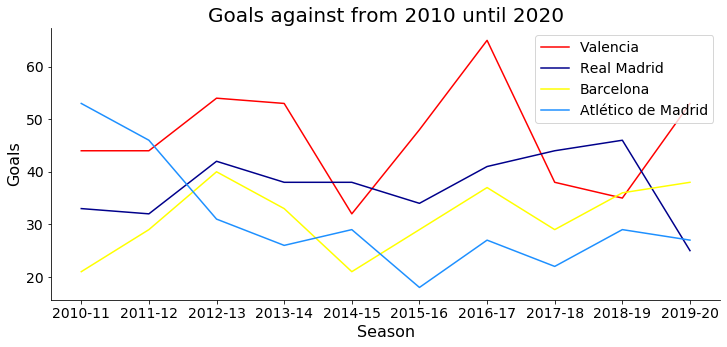

In [4]:
fig2 = plt.figure(figsize=(12,5))

ax = plt.gca()

# plot the results using a line plot
colors = ['red', 'darkblue', 'yellow',  'dodgerblue', 'darkviolet']

for index, column in enumerate(selected_teams.columns):
    ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])
    
# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# xticks size
ax.tick_params(axis='both', labelsize = 14)

# legend legend
ax.legend(fontsize=14, loc='upper right')

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Goals', fontsize=16)

# 2. Color
The misuse of **color** is a common problem when making visualizations, as is often used for aesthetical rather than **informative purposes**. Color plays a key role in storytelling and can be used strategically for **indicating to the audience where to look** [2].

In the original plot, all lines have bright colors and are equally competing for the attention of the viewer. To overcome this drawback, the visualization above is redesigned using **grey for all lines** except for **the one that we want to emphasize which is represented in red**, giving the audience a hint about where to look.

Text(0, 0.5, 'Goals')

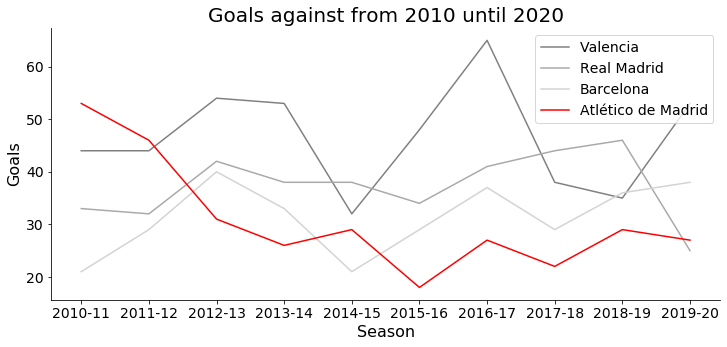

In [5]:
fig3 = plt.figure(figsize=(12,5))

ax = plt.gca()

colors = ['grey', 'darkgrey', 'lightgrey', 'red']
for index, column in enumerate(selected_teams.columns):
    ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])


# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# xticks size
ax.tick_params(axis='both', labelsize = 14)

# legend legend
ax.legend(fontsize=14, loc='upper right')

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20)
ax.set_xlabel('Season', fontsize=16)
ax.set_ylabel('Goals', fontsize=16)

**Colors** have **meanings associated** with them. And therefore, when designing visualizations, it is important to bear in mind that colors can **evoke certain emotions** and use them accordingly to avoid misunderstandings [2]. The color red is often linked to feelings of danger and caution and is associated with a negative outcome. For this reason, it must be used sparingly when it comes to visualizations. However, this case is an exception because, as you might know, football teams have also representative colors. Any reader familiar with the Spanish football league will associate red with Atletico de Madrid, so that, in this context, the use of another color (rather than red) could be misleading.

Additionally, we can also use grey for secondary elements such as titles, labels, and axis to make our **data stand out more**.

Text(0, 0.5, 'Goals')

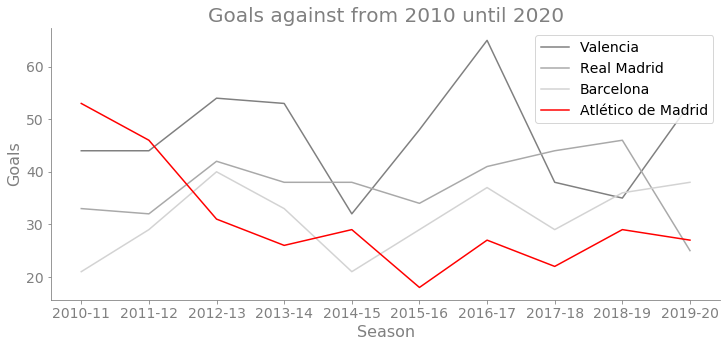

In [6]:
fig4 = plt.figure(figsize=(12,5))

ax = plt.gca()

colors = ['grey', 'darkgrey', 'lightgrey', 'red']
for index, column in enumerate(selected_teams.columns):
    ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# spines colors 
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# xticks size and color 
ax.tick_params(axis='both', colors='grey', labelsize = 14)

# legend legend
ax.legend(fontsize=14, loc='upper right')

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20, color='grey')
ax.set_xlabel('Season', fontsize=16, color='grey')
ax.set_ylabel('Goals', fontsize=16, color='grey')

# 3. Linewidth
**Preattentive attributes** help us to **rapidly recognize** an element in a visualization [3] without our conscious action. This is achieved by modifying the appearance of one particular element so that it sticks out from the rest of the data. These attributes are effective because our brains are able to instantly notice **differences in the environment** [4]. In the preceding section, we have only used **color** (red vs a greyscale) as a preattentive attribute to highlight a particular line of the visualization; however, there are many more preattentive attributes you can use to draw the attention of the audience.

Colin Ware divides **preattentive attributes** into 4 general categories [5]:
* **Color**: This category includes two attributes (1) color **hue** and (2) color **intensity**. Color hue is used to differentiate between categories, whereas color intensity can carry numeric values [2].  
* **Form**: We can change the form of an element such as its **size, length, curvature, or orientation** if we want to emphasize it.
* **Spatial position**: This visual encoding includes attributes such as **2D positioning, stereoscopic depth, and concave/convex positioning** [6].
* **Movement**: This preattentive attribute is especially useful in **interactive visualizations** for catching the attention of the audience.

As I previously mentioned, preattentive attributes can be used together; for instance, we can change not only the **color** but also the **form** (linewidth) of an element to draw more effectively the attention of the viewer, as shown in the image below.

Text(0, 0.5, 'Goals')

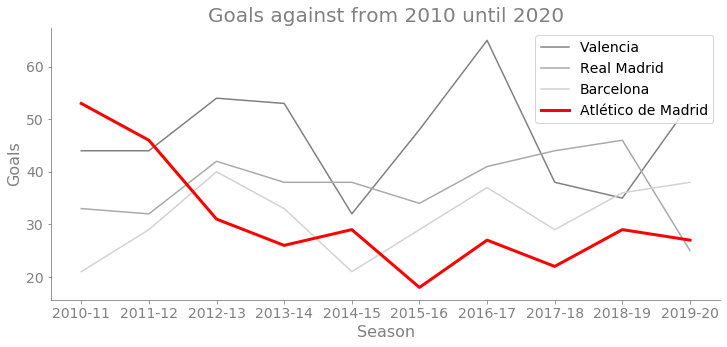

In [7]:
fig4 = plt.figure(figsize=(12,5))

ax = plt.gca()

colors = ['grey', 'darkgrey', 'lightgrey', 'red']
for index, column in enumerate(selected_teams.columns):
    if column == 'Atlético de Madrid':
         ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index], linewidth=3)
    else: 
        ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# spines colors 
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# xticks size and color 
ax.tick_params(axis='both', colors='grey', labelsize = 14)

# legend legend
ax.legend(fontsize=14, loc='upper right')

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20, color='grey')
ax.set_xlabel('Season', fontsize=16, color='grey')
ax.set_ylabel('Goals', fontsize=16, color='grey')

# 4. Direct Labeling
Most visualization tools like Matplotlib or Seaborn provide a **legend** by default to represent data series in a visualization. However, the use of a legend has a drawback. The viewer has to continuously scan back and forth between the legend and the graph, being the visualization process highly time-consuming. Alternatively, for line plots, we can **directly label** the data series rather than providing a color-coded legend, as shown below. By doing so, we make the graph more legible and easy to comprehend.

Text(0, 0.5, 'Goals')

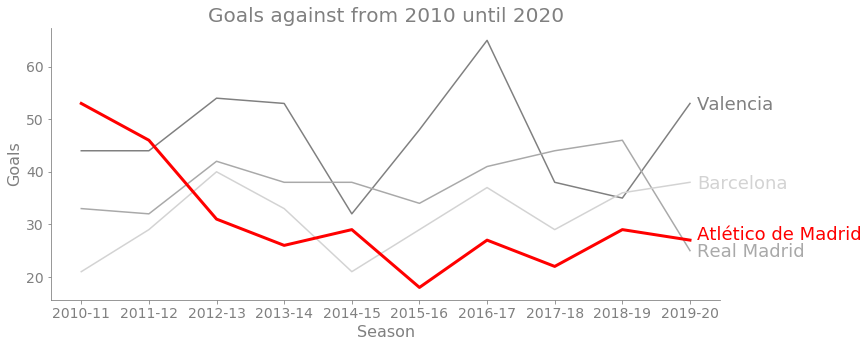

In [8]:
fig5 = plt.figure(figsize=(12,5))

ax = plt.gca()

colors = ['grey', 'darkgrey', 'lightgrey', 'red']
for index, column in enumerate(selected_teams.columns):
    if column == 'Atlético de Madrid':
         ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index], linewidth=3)
    else: 
        ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# spines colors 
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# xticks size and color 
ax.tick_params(axis='both', colors='grey', labelsize = 14)

# legend legend
ax.legend('', frameon=False)


for index, column in enumerate(selected_teams.columns):
    y_pos =  selected_teams.loc['2019-20', column]
    if column == 'Atlético de Madrid':
        plt.text(9.1, y_pos, column, fontsize=18, color=colors[index])
    else: 
        plt.text(9.1, y_pos-1.2, column, fontsize=18, color=colors[index])

# define the title and the labels
ax.set_title('Goals against from 2010 until 2020', fontsize=20, color='grey')
ax.set_xlabel('Season', fontsize=16, color='grey')
ax.set_ylabel('Goals', fontsize=16, color='grey')

# 5. Titles and subtitles
We can use strategically the **title** to describe the **main idea** we want to convey to the reader and not just to give a boring description of the data, as we originally did. In this particular case, we want the audience to take away from the graphic that Atlético de Madrid has the best defense in the Spanish league, so we place this idea on the title of the visualization, enabling the reader to comprehend the principal message of the graphic at a glance. In addition, we provide **supplementary information** related to the data on the **subtitle** to ensure the correct interpretation of the visualization. Finally, we align both the title and the subtitle on the left. By doing that, we make sure that the reader focus firstly on that information.

Text(0, 0.5, 'Goals against')

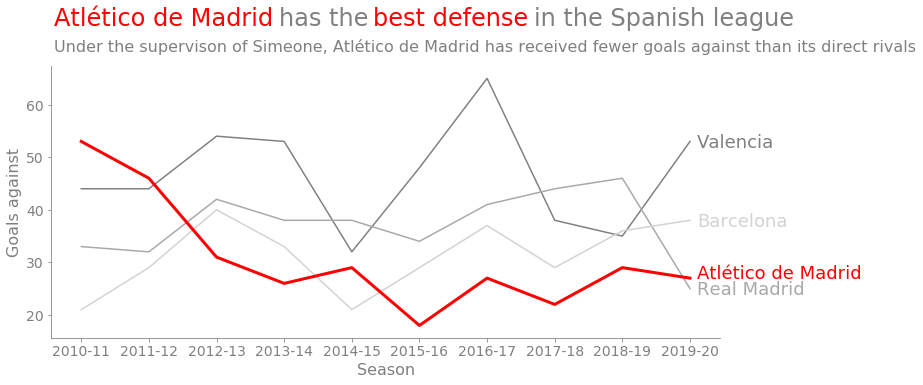

In [20]:
fig6 = plt.figure(figsize=(12,5))

ax = plt.gca()

colors = ['grey', 'darkgrey', 'lightgrey', 'red']
for index, column in enumerate(selected_teams.columns):
    if column == 'Atlético de Madrid':
         ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index], linewidth=3)
    else: 
        ax.plot(selected_teams[column], label=selected_teams[column].name, color=colors[index])

# Hide the right and top spines
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

# spines colors 
ax.spines['bottom'].set_color('grey')
ax.spines['left'].set_color('grey')

# xticks size and color 
ax.tick_params(axis='both', colors='grey', labelsize = 14)

# legend legend
ax.legend('', frameon=False)


for index, column in enumerate(selected_teams.columns):
    y_pos =  selected_teams.loc['2019-20', column]
    if column == 'Atlético de Madrid':
        plt.text(9.1, y_pos, column, fontsize=18, color=colors[index])
    else: 
        plt.text(9.1, y_pos-1.2, column, fontsize=18, color=colors[index])

# define the title and the labels
#ax.set_title('Accidents in 2017 in Barcelona\n', fontsize=24, color='grey', loc='left')
plt.text(-0.4, 75, 'Atlético de Madrid', fontsize=24, color='red')
plt.text(2.92, 75, 'has the ', fontsize=24, color='grey')
plt.text(4.32, 75, 'best defense ', fontsize=24, color='red')
plt.text(6.7, 75, 'in the Spanish league', fontsize=24, color='grey')
plt.text(-0.4, 70, 'Under the supervison of Simeone, Atlético de Madrid has received fewer goals against than its direct rivals', fontsize=16, color='grey')

#ax.set_title('Goals against from 2010 until 2020', fontsize=20, color='grey')
ax.set_xlabel('Season', fontsize=16, color='grey')
ax.set_ylabel('Goals against', fontsize=16, color='grey')

And voila! Now we have a much more compelling visualization that effectively transmits a specific idea!

# References

[1] Edward Tufte. The Visual Display of Quantitative Information. Second Edition, Graphics Press, USA, 1991.

[2] Cole Nussbaumer. Being Clever with Color [video file]. 2015 Oct 1 [cited 2020 Oct 30]. Available from: https://www.youtube.com/watch?v=AiD6etOB6qI&t=1200s. 

[3] Udacity. Atributos Pre-atenção [video file]. 2015 Feb 23 [cited 2020 Oct 30]. Available from: https://www.youtube.com/watch?v=AiD6etOB6qI&t=1200s.

[4] Cole Nussbaumer. Storytelling with Data: A Data Visualization Guide for Business Professionals. First Edition, Wiley, USA, 2015.

[5] Colin Ware. Information Visualization: Perception for Design. Third Edition, Elsevier, 1999.

[6] Pablo Hernandez. Learn how the brain works for kick-ass visualizations!; 2020 Feb 13 [cited 2020 Oct 31]. Available from: https://www.diabetesaustralia.com.au/gestational-diabetes